In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")


df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EDA

In [2]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


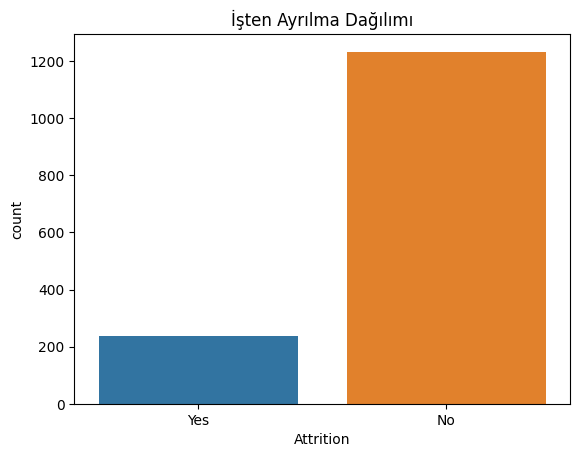

In [4]:
# Ayrılma oranı
sns.countplot(x='Attrition', data=df)
plt.title('İşten Ayrılma Dağılımı')
plt.show()


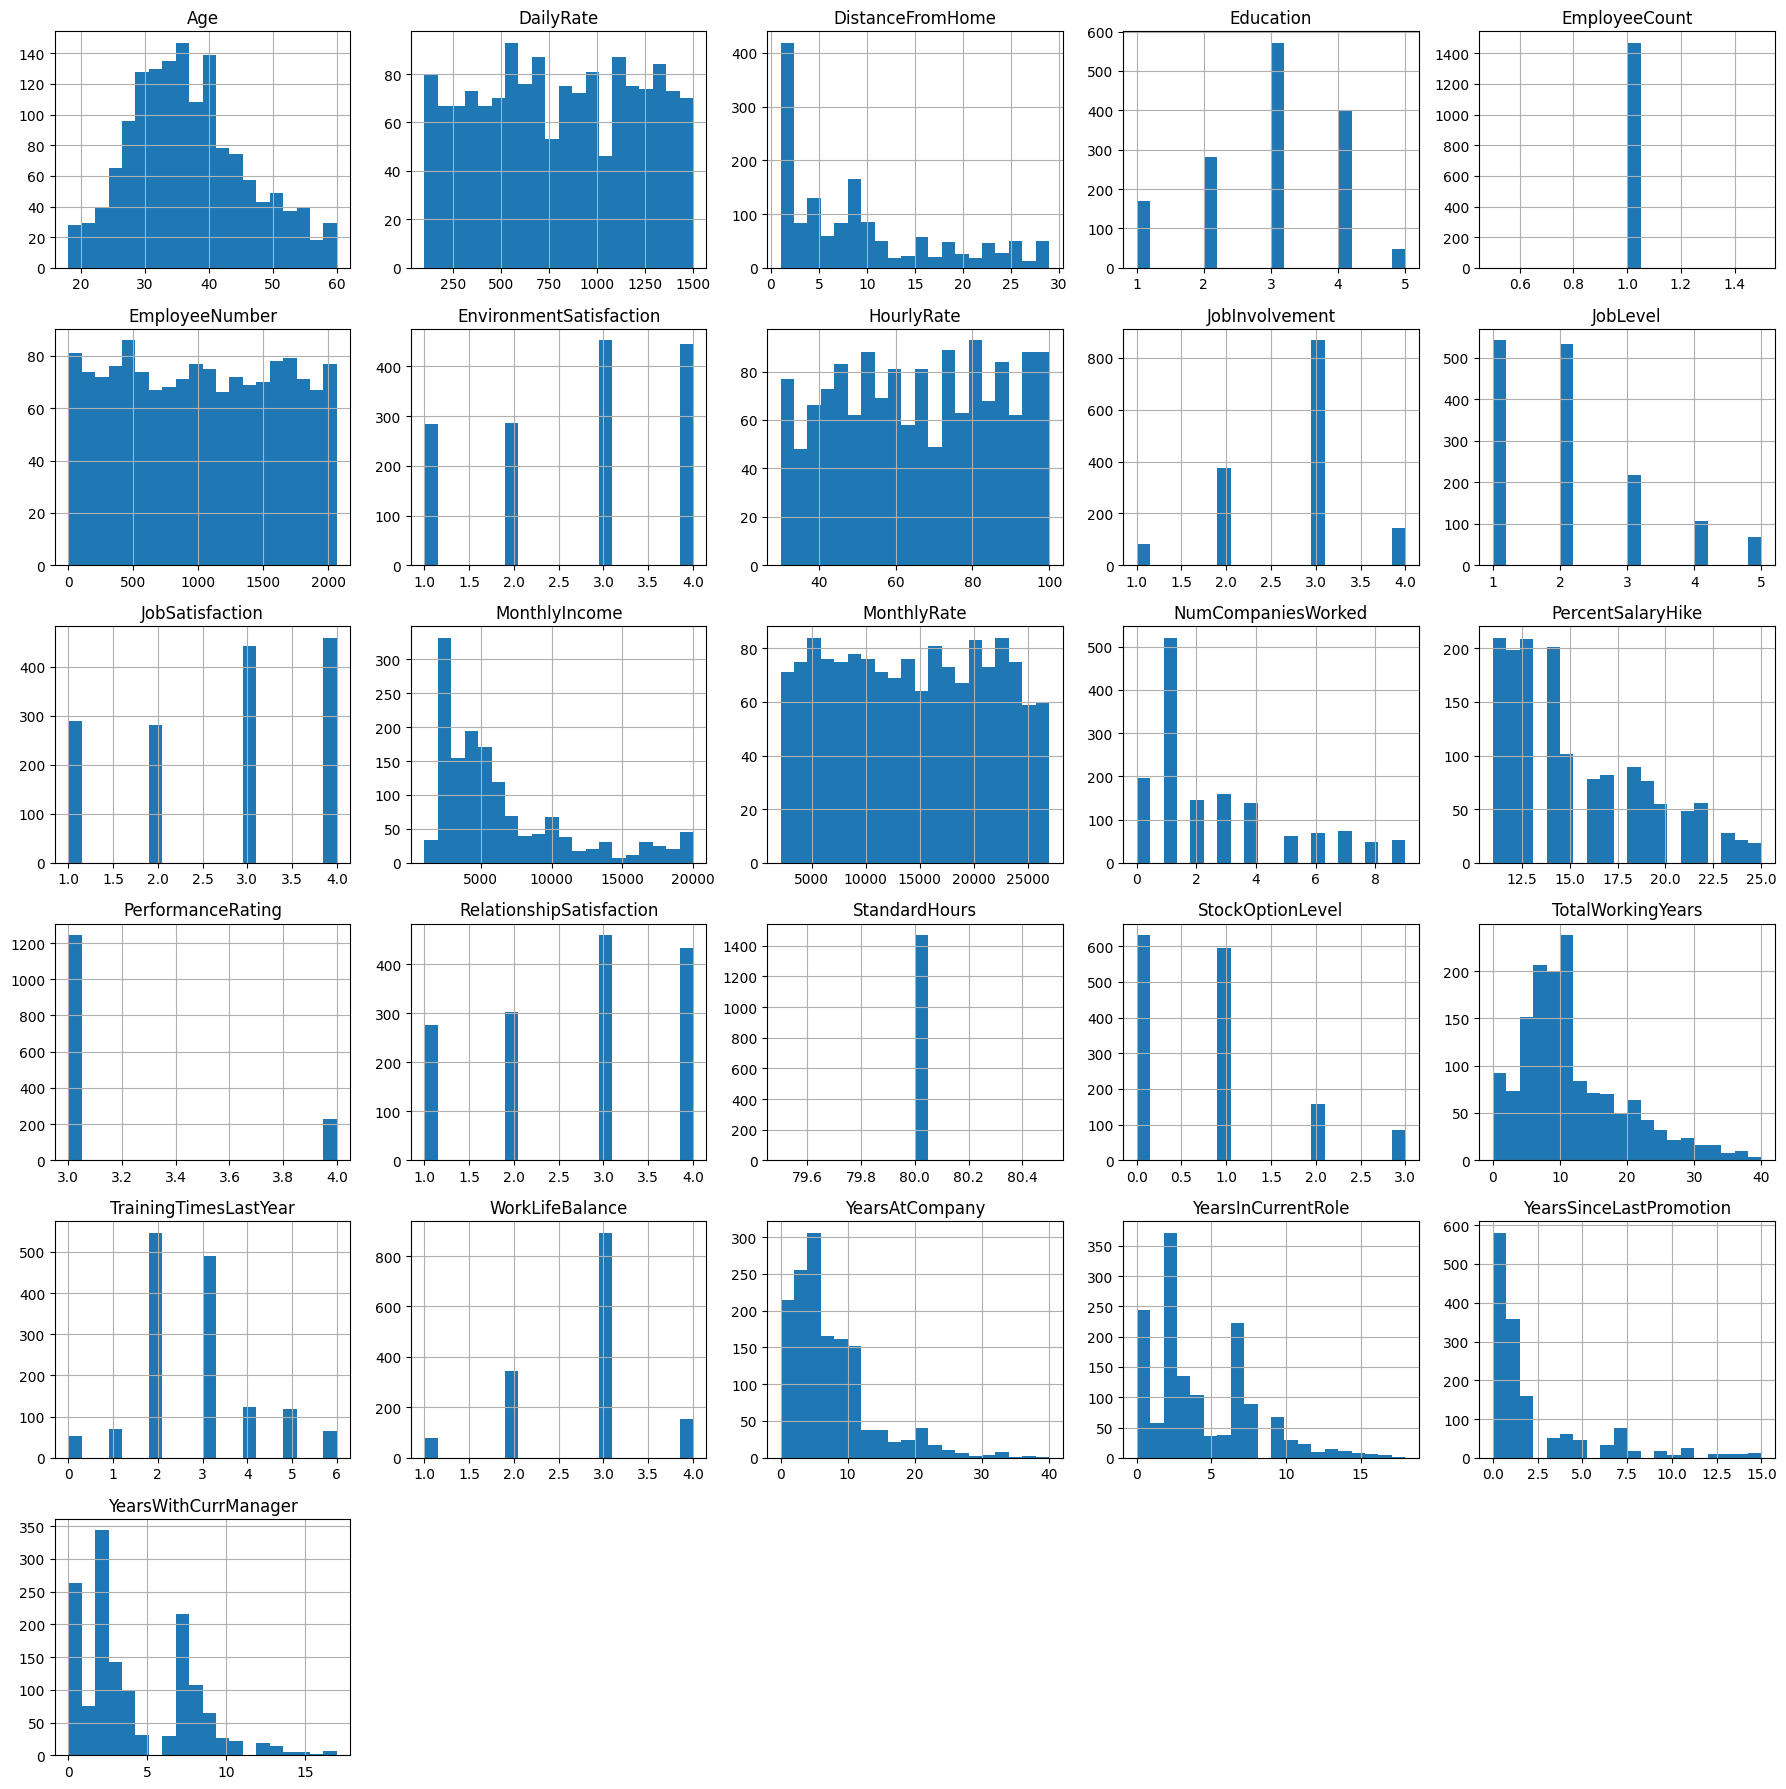

In [5]:
df.hist(figsize=(18,18), bins=20)
plt.tight_layout()
plt.show()


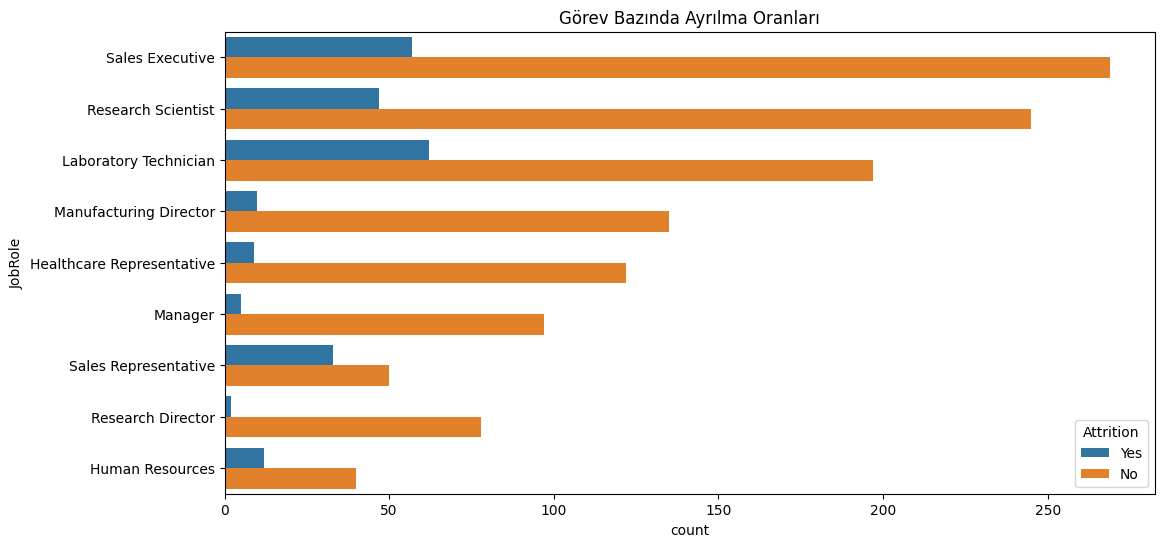

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title('Görev Bazında Ayrılma Oranları')
plt.show()


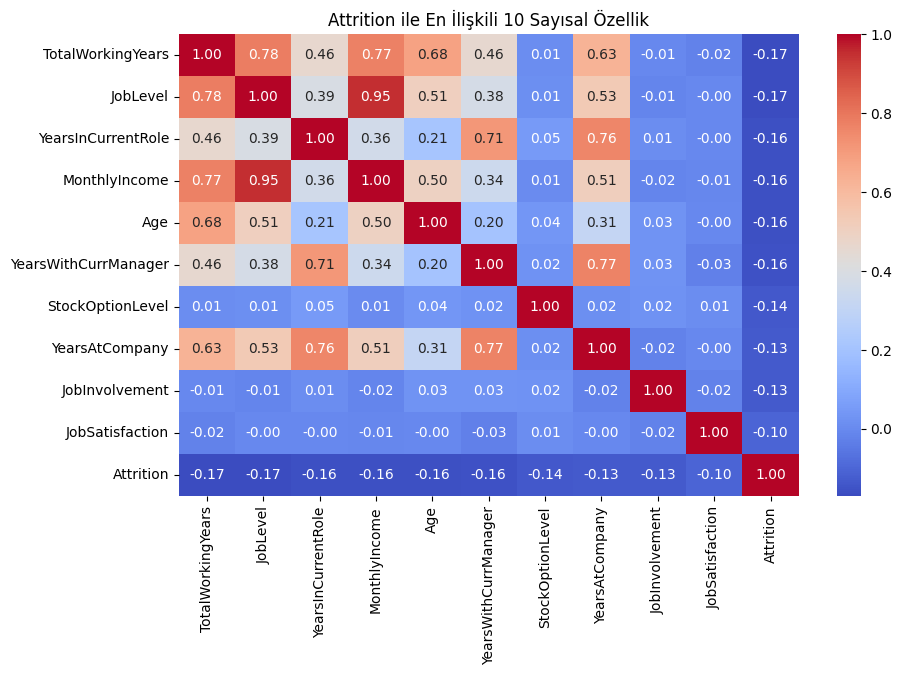

In [7]:

# Attrition sütununu dönüştürelim
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Sadece sayısal sütunları seçeli
numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr = numeric_df.corr()['Attrition'].abs().sort_values(ascending=False)


top_features = corr[1:11].index.tolist()

# Korelasyonu görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df[top_features + ['Attrition']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Attrition ile En İlişkili 10 Sayısal Özellik")
plt.show()


##  HR Analytics 

In [8]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv") 
# Attrition sütununu sayısala çevirelim (Yes: 1, No: 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Özellik mühendisliğini tekrar yapalım:
df['TotalExperience'] = df['TotalWorkingYears'] 
df['ExperienceRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
df['YoungEmployee'] = df['Age'].apply(lambda x: 1 if x < 30 else 0)
df['FrequentTravel_OverTime'] = df.apply(lambda x: 1 if (x['BusinessTravel']=='Travel_Frequently') & (x['OverTime']=='Yes') else 0 , axis=1)

# İlk 5 satırı kontrol edelim
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalExperience,ExperienceRatio,YoungEmployee,FrequentTravel_OverTime
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,8,0.666667,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,10,0.909091,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,7,0.000000,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,8,0.888889,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,6,0.285714,1,0


In [9]:
df.drop(['OverTime', 'BusinessTravel', 'TotalWorkingYears', 
         'YearsAtCompany'], axis=1, inplace=True)




In [10]:
df.select_dtypes(include=['object']).columns


Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18'],
      dtype='object')

In [11]:
# One-Hot Encoding'i uygulayalım
categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype="int64")

# Sonucu kontrol edelim
df_encoded.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,...,0,1,0,0,0,0,0,0,1,0


In [12]:

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

# Modelleri oluşturalım
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [logreg, dtree, rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']


for model in models :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.8810
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.70      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.79      0.58      0.61       294
weighted avg       0.86      0.88      0.85       294

DecisionTreeClassifier Accuracy: 0.7857
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       255
           1       0.25      0.31      0.28        39

    accuracy                           0.79       294
   macro avg       0.57      0.58      0.58       294
weighted avg       0.81      0.79      0.79       294

RandomForestClassifier Accuracy: 0.8707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg

## SMOTE ile Veri Dengesi Sağlama

In [14]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE sonrası veri dağılımını kontrol edelim
import collections
print("Öncesi:", collections.Counter(y_train))
print("Sonrası (SMOTE):", collections.Counter(y_train_smote))

Öncesi: Counter({0: 978, 1: 198})
Sonrası (SMOTE): Counter({0: 978, 1: 978})


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hiperparametre listesi
param_grid = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_depth': [10, 20, None],     # Ağaç derinliği
    'min_samples_split': [2, 5, 10], # Bölme kriterleri
    'min_samples_leaf': [1, 2, 4]    # Yaprak başına örnek sayısı
}

# Modeli oluştur
rf = RandomForestClassifier(random_state=42)

# GridSearchCV ile en iyi hiperparametreleri bul
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# En iyi parametreleri yazdıralım
print("En iyi parametreler:", grid_search.best_params_)

# Optimize edilmiş modelle test setinde tahmin yap
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Performansı ölçelim
from sklearn.metrics import classification_report, accuracy_score

print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final Model Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.53      0.41      0.46        39

    accuracy                           0.87       294
   macro avg       0.72      0.68      0.70       294
weighted avg       0.86      0.87      0.87       294



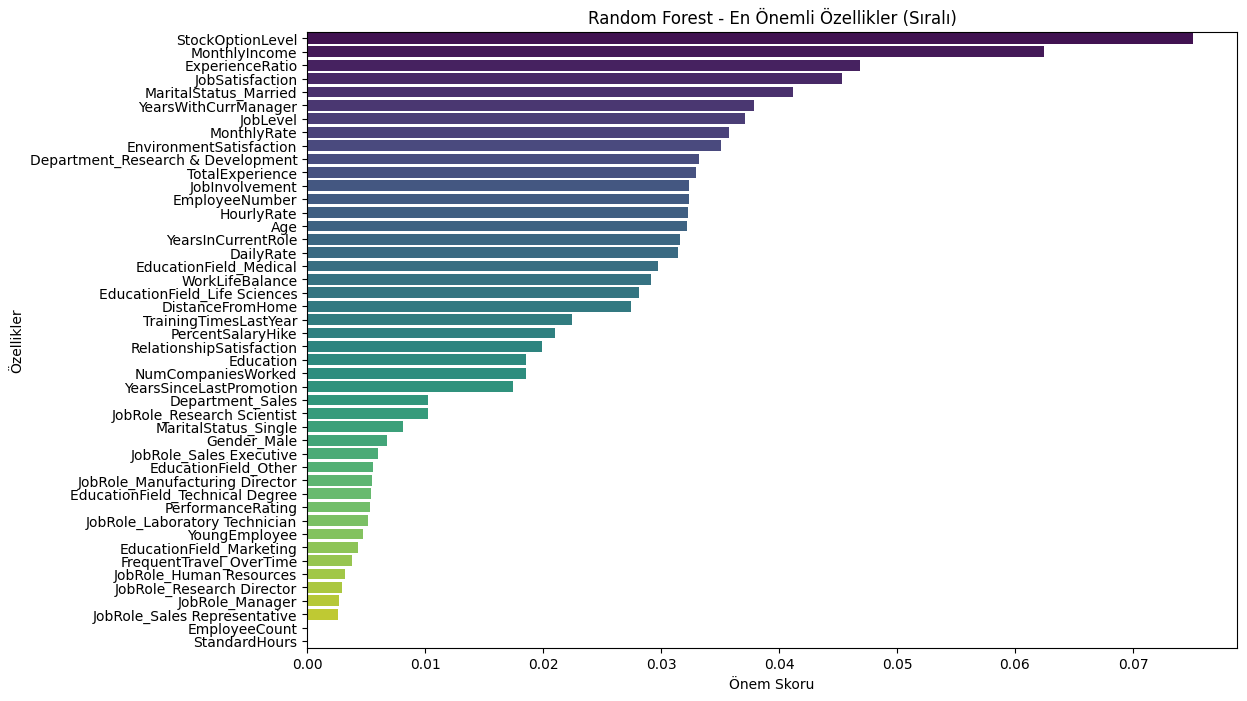

In [16]:


# Özellik önemlerini DataFrame olarak oluştur
feature_importance_df = pd.DataFrame({
    'Özellik': X_train.columns,
    'Önem Skoru': best_rf.feature_importances_
})

# Büyükten küçüğe sırala
feature_importance_df = feature_importance_df.sort_values(by='Önem Skoru', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='Önem Skoru', y='Özellik', data=feature_importance_df, palette='viridis')
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.title("Random Forest - En Önemli Özellikler (Sıralı)")
plt.show()
